In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from seaborn import load_dataset
import matplotlib.pyplot as plt
import math
dataset = load_dataset('titanic')
rows, columns = dataset.shape
dataset.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


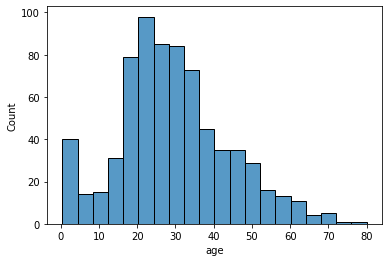

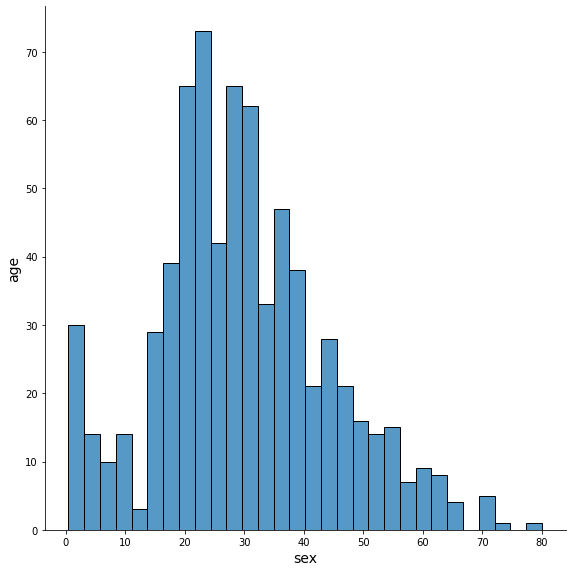

In [2]:
dataset.describe(include = 'all')
dataset.info()
sbn.histplot(data= dataset, x='age')

sbn.displot(dataset,
            x = 'age',
            bins=30,
            height=8)
plt.xlabel('sex', size=14)
plt.ylabel('age', size=14)
plt.savefig('age vs sex.png')

# Steps in Data Pre-processing


1.   Missing value imputation
2.   Eliminating outliers
3.   Scaling and normalization
4.   Feature selection or elimination
5.   Eliminating duplicated data
6.   Denoising data
7.   Discretization



In [3]:
TBD = ['alive', 'embark_town', 'deck', 'class','sex', 'alone','adult_male']
dataset.drop(TBD, axis = 1, inplace = True)
dataset['age'] = dataset['age'].fillna(dataset['age'].median())
dataset['embarked'] = dataset['embarked'].fillna(dataset['embarked'].mode())
#dataset['class'] = dataset['class'].fillna(dataset['class'].mode())

dataset.info()

for r in range(rows):
  if dataset['survived'][r] == 0:
    dataset['survived'][r] = -1

for r in range(rows):
  if dataset['who'][r] == 'man':
    dataset['who'][r] = 0
  elif dataset['who'][r] == 'woman':
    dataset['who'][r] = 2
  else:
    dataset['who'][r] = 1




# for r in range(rows):
#   if dataset['adult_male'][r] == True:
#     dataset['adult_male'][r] = 1
#   else:
#     dataset['adult_male'][r] = 0

for r in range(rows):
  if dataset['embarked'][r] == 'S':
    dataset['embarked'][r] = 1
  elif dataset['embarked'][r] == 'Q':
    dataset['embarked'][r] = 2
  else:
    dataset['embarked'][r] = 3

dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
 7   who       891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<ipython-input-3-c7deb11e0ac9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['survived'][r] = -1
<ipython-input-3-c7deb11e0ac9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['who'][r] = 0
<ipython-input-3-c7deb11e0ac9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['who'][r] = 2
<ipython-input-3-c7deb11e0ac9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,-1,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,3,2
2,1,3,26.0,0,0,7.9250,1,2
3,1,1,35.0,1,0,53.1000,1,2
4,-1,3,35.0,0,0,8.0500,1,0
5,-1,3,28.0,0,0,8.4583,2,0
6,-1,1,54.0,0,0,51.8625,1,0
7,-1,3,2.0,3,1,21.0750,1,1
8,1,3,27.0,0,2,11.1333,1,2
9,1,2,14.0,1,0,30.0708,3,1


In [4]:
m, n = dataset.shape
w = np.ones(n+2)*2.0
lamb = 0.01
iterations = 100
old_w = w
for itr in range(iterations):
  for a in range(1, n+1):
    dEdw = 0
    for i in range(m):
      z = 0
      for k in range(1, n):
        z = z + old_w[k] * dataset.iloc[i,k]
      z = z + old_w[n]
      dEdw += dataset['survived'][i] * math.log2(math.e) * (1.0 - (1.0/(1.0+math.pow(math.e, -1.0*dataset['survived'][i]*z))))
    if a < n:
      w[a] = old_w[a] + lamb*dEdw*dataset.iloc[i,a]/m
    else:
      w[a] = old_w[a] + lamb*dEdw/m
  old_w = w
    
print(w)

[ 2.          1.68048848 -1.40628519  2.          2.          1.23840136
  1.80471755  2.          1.90237831  2.        ]


In [5]:
error = 0
for i in range(m):
  z = 0
  for j in range(1, n):
    z = z + w[j]*dataset.iloc[i,j]
  z = z + w[n]
  z = math.pow(math.e,-1.0*z)
  z = 1.0/(1.0+z)
  pred = -1
  if z > 0.5:
    pred = 1
  if pred != dataset['survived'][i]:
    error += 1
error = error / m

print(1-error)

0.6947250280583614


0.6868686868686869 with who 
.67 with sex
0.6947250280583614 with who -adult male